In [1]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [2]:
#display the loaded data
def display_img(img_set,title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3,3,i+1)
    plt.imshow(img_set[i],cmap = 'gray')
    plt.title(title_set[i])
  plt.show()

  plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
[5 0 4 1 9 2 1 3 1]


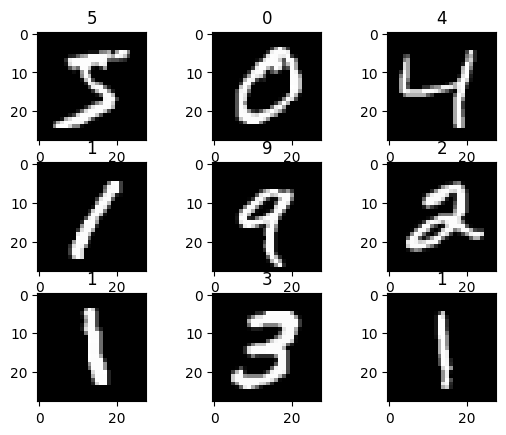

In [3]:
#load data
(trainX,trainY),(testX,testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))
print(trainY[:9])
#display some loaded image data
display_img(trainX[:9],trainY[:9])

#for better accuracy the data normalization is needed
#data normalization
trainX = trainX / 255.0
testX = testX / 255.0



In [4]:
print(trainX[:2])
print(len(trainX))

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
60000


In [5]:
# Turn 2D images into 3D so that trainX and TrainY will be 4D since Convolutional layer takes 4D data as input.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))
print(trainY[:2])
# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:2])

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1))
trainX.dtype: float64, testX.dtype: float64
trainX.Range: 1.0 - 0.0, testX.Range: 1.0 - 0.0
[5 0]
trainY.shape: (60000, 10), testY.shape: (10000, 10))
trainY.dtype: float64, testX.dtype: float64
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
inputs = Input(shape=(28, 28, 1), name = 'InputLayer')
x = Flatten()(inputs)
x = Dense(512, activation = 'relu')(x)
Dropout(0.3)  # Dropout to prevent overfitting
x = Dense(256, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(128, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(64, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(32, activation = 'relu')(x)
Dropout(0.3) 
x = Dense(16, activation = 'relu')(x)
Dropout(0.3) 
outputs = Dense(10, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'Multi-Class-Classifier')
model.summary()

Model: "Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577,178 (2.20 MB)

 Trainable params: 577,178 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #Back-propagation
# Train the model
history = model.fit(trainX, trainY, batch_size=64, epochs=10, validation_split=0.1)
#Total backpropagation steps = Epochs×Batches Per Epoch = 10 x 844 times back-propagation occur

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8012 - loss: 0.6199 - val_accuracy: 0.9648 - val_loss: 0.1245
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9678 - loss: 0.1092 - val_accuracy: 0.9717 - val_loss: 0.0977
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9807 - loss: 0.0666 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9827 - loss: 0.0563 - val_accuracy: 0.9742 - val_loss: 0.0994
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9862 - loss: 0.0469 - val_accuracy: 0.9785 - val_loss: 0.0759
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9782 - val_loss: 0.0812
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9773 - val_loss: 0.0887
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9921 - loss: 0.0262 - val_accuracy:

In [12]:
# Evaluate model performance
result = model.evaluate(testX, testY)
print("Test Loss:", result[0])
print("Test Accuracy:", result[1])

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))
#The np.argmax() function in NumPy is used to find the index of the maximum value

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9764 - loss: 0.1095
Test Loss: 0.09354206174612045
Test Accuracy: 0.9789000153541565
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 6
9 		 9


[0.9067592620849609, 0.9691481590270996, 0.9790555834770203, 0.9823889136314392, 0.986037015914917, 0.9888148307800293, 0.9902222156524658, 0.9912407398223877, 0.9929074048995972, 0.9926666617393494]


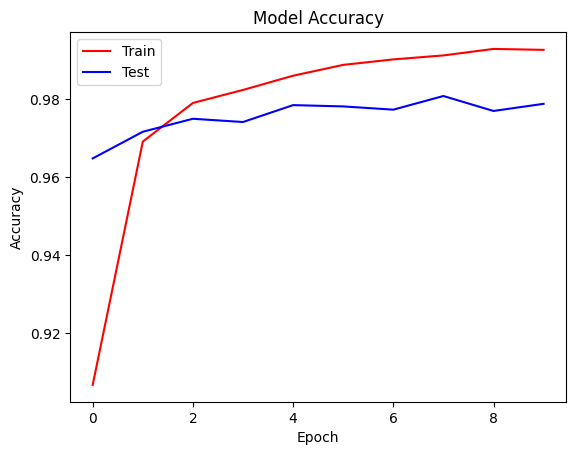

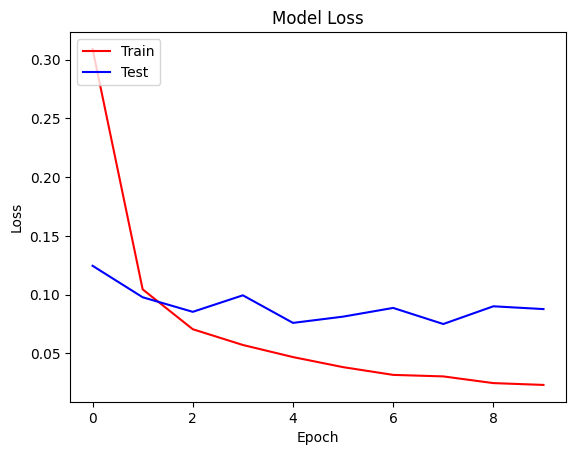

In [11]:
import matplotlib.pyplot as plt
print(history.history['accuracy'])
# Plot training & validation accuracy
plt.plot(history.history['accuracy'],color='r')# Access training accuracy over epochs
plt.plot(history.history['val_accuracy'],color='b')# Access validation accuracy over epochs
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'],color='r')# Access loss during training
plt.plot(history.history['val_loss'],color='blue')# Access validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
